In [14]:
#imports all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
#load the data with pandas dataframe
df=pd.read_csv('bear.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [16]:
#checking for null values
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [17]:
df.rename(columns = {'Monthly beer production':'production'}, inplace = True)

In [18]:
#to fit in linear regression model convert the datetime format
#of month to integer
df["Month"] = pd.to_datetime(df["Month"]).dt.strftime("%Y%m")
df['Month']=df["Month"].astype(int)
df.head()

,Month,production
0,195601,93.2
1,195602,96.0
2,195603,95.2
3,195604,77.1
4,195605,70.9


In [1]:
#taking train_test_split to split the data in two parts for train and test
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\user\.conda\envs\panadas-tutorial\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'df' is not defined

In [20]:
#making the model 
model = LinearRegression()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

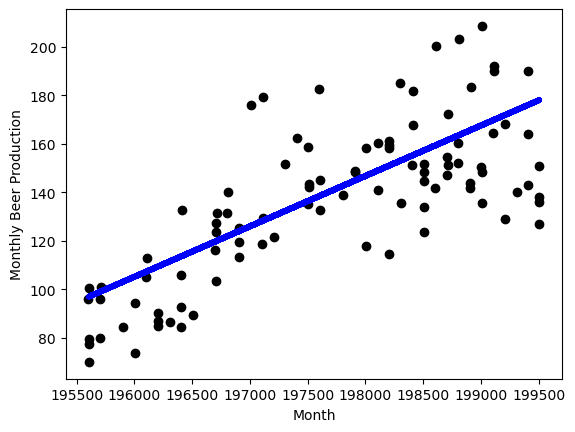

0.5383148749778381


In [21]:
#with the predicted value and actual value find the r2 score and plot the data
from sklearn.metrics import r2_score

x=r2_score(y_test, y_pred)
    
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=4)
plt.xlabel('Month')
plt.ylabel('Monthly Beer Production')
plt.show()
print(x)

In [22]:
#so we get the r2 score as .538 means 53.8% that is too much low perfection
#so now we try to fit this data to another model